In [205]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Exercise 4

In [206]:
class GridWorld:
    def __init__(self, grid_size=4, max_steps=100):
        self.grid_size = grid_size
        self.max_steps = max_steps
        self.num_actions = 4  # Up, Down, Left, Right
        self.actions = ['up', 'down', 'left', 'right']
        self.actions_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
        self.terminal_states = [(0, 0), (grid_size - 1, grid_size - 1)]
        self.policy = np.ones((grid_size, grid_size, len(self.actions))) / len(self.actions)  # Initialize with uniform policy
        self.reset()

    def reset(self):
        self.state = (self.grid_size - 1, 0)  # Start from lower left corner
        self.steps = 0
        return self.state

    def step(self, state, action, evaluate=False):
        if not evaluate:
            self.steps += 1

        if state in self.terminal_states:
            return state, 0, True  # Remain in the same terminal state
        
        if self.steps >= self.max_steps:
            return state, 0, True   

        x, y = state
        dx, dy = self.actions_map[action]
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
            next_state = (new_x, new_y)
        else:
            next_state = (x, y)  # Stay in the same state if the action is invalid

        reward = -1  # Always receive a reward of -1 for each step
        done = next_state in self.terminal_states

        if not evaluate:
            self.state = next_state

        return next_state, reward, done

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        for terminal_state in self.terminal_states:
            grid[terminal_state] = -10  # Mark terminal states with a distinct value
        grid[self.state] = 1  # Mark current state with a value of 1
        print(grid)


    def plot_policy(self, custom_title = None):
        # Create a grid of coordinates
        X, Y = np.meshgrid(range(self.grid_size), range(self.grid_size))

        # Create a mapping from policy actions to arrow directions
        action_to_arrow = {'up': (0, -1), 'down': (0, 1), 'left': (-1, 0), 'right': (1, 0)}

        # For each state, plot an arrow for each action in the policy
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) in self.terminal_states:
                    plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='gray', alpha=0.5))
                    continue
                for action, prob in enumerate(self.policy[i, j]):
                    if prob > 0:
                        U, V = action_to_arrow[self.actions[action]]
                        plt.quiver(j+0.5, i+0.5, U, V, angles='xy', scale_units='xy', scale=2.0)

        plt.xlim([0, self.grid_size])
        plt.ylim([0, self.grid_size])
        plt.gca().invert_yaxis()  # Invert y-axis so that the (0,0) state is at the top left
        plt.grid()
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        if custom_title is not None:
            plt.title(custom_title)
        else:
            plt.title(f' policy after value iteration: Steps = {self.steps}')
        plt.title(f'Final policy after value iteration: Steps = {self.steps}')
        plt.show()

In [207]:
env = GridWorld()

for _ in range(10):
    env.render()
    action = np.random.choice(env.actions)  # Choose a random action
    state, reward, done = env.step(env.state, action)
    print("Action:", action)
    print("State:", state)
    print("Reward:", reward)
    print("Done:", done)
    print()

    if done:
        break

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: up
State: (2, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0.   0.]
 [  0.   0.   0. -10.]]
Action: up
State: (1, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  1.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0. -10.]]
Action: right
State: (1, 1)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0. -10.]]
Action: left
State: (1, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  1.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0. -10.]]
Action: up
State: (0, 0)
Reward: -1
Done: True



## Exercise 5

In [208]:
def iterative_policy_evaluation(env, threshold=1e-10, gamma=1.0, print_values=False):
    V = np.zeros((env.grid_size, env.grid_size))  # Initialize V arbitrarily
    delta = threshold + 1
    deltas = []
    sweep_num = 0 
    while delta > threshold:
        delta = 0
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                v = V[i, j]
                new_v = 0
                for k, action in enumerate(env.actions):
                    next_state, reward, _ = env.step((i, j), action, evaluate=True)
                    new_v += env.policy[i, j, k] * (reward + gamma * V[next_state[0], next_state[1]])

                V[i, j] = new_v
                delta = max(delta, abs(v - new_v))

        deltas.append(delta)
        sweep_num += 1
        if print_values and sweep_num in [0,1,2,3,10]:
            #print V round to 2 decimal
            print(np.round(V,2))

    return V, deltas

Estimated state values (V_pi):
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


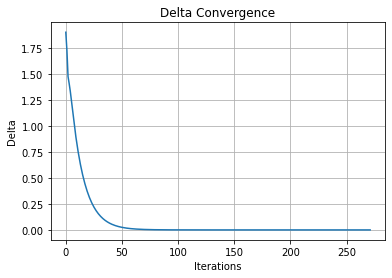

In [209]:
# Define the grid world environment
env = GridWorld()

# Define the equiprobable random policy

# Perform iterative policy evaluation
V_pi, delta_values = iterative_policy_evaluation(env)

print("Estimated state values (V_pi):")
print(V_pi)

# Plot delta over time
plt.plot(delta_values)
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title('Delta Convergence')
plt.grid(True)
plt.show()

## Exercise 6

In [210]:
def improve_policy(env, V, gamma=1.0):
    policy_stable = True
    for i in range(env.grid_size):
        for j in range(env.grid_size):
            old_best_actions = np.flatnonzero(env.policy[i, j] == env.policy[i, j].max()) #TODO check
            best_actions = []
            best_action_value = float('-inf')
            for k, action in enumerate(env.actions):
                next_state, reward, _ = env.step((i,j), action, evaluate=True)
                action_value = reward + gamma * V[next_state[0], next_state[1]]
                if action_value > best_action_value:
                    best_actions = [k]
                    best_action_value = action_value
                elif action_value == best_action_value:
                    best_actions.append(k)
            action_prob = 1.0 / len(best_actions)
            for action_idx in range(len(env.actions)):
                if action_idx in best_actions:
                    env.policy[i, j, action_idx] = action_prob
                else:
                    env.policy[i, j, action_idx] = 0.0 
            if not np.array_equal(best_actions, old_best_actions):
                policy_stable = False
    return policy_stable

def policy_iteration(env, threshold=1e-6, gamma=1.0):
    policy_stable = False
    while not policy_stable:
        V, _ = iterative_policy_evaluation(env, threshold, gamma)
        policy_stable = improve_policy(env, V, gamma)
    return V, env.policy

# Define the grid world environment
env = GridWorld()

# Perform policy iteration
V_star, pi_star = policy_iteration(env)

print("Optimal state values (V_star):")
print(V_star)

Optimal state values (V_star):
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


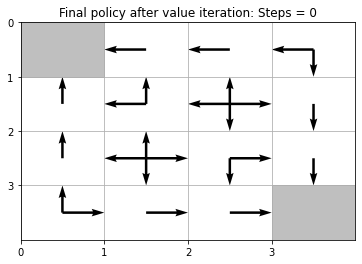

In [211]:
env.plot_policy()